In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from scipy import stats
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('Team_Sports_Survey_Preprocessed.csv')
data

,Gender,Age Group,Monthly Income (Php),First Preferred Activity Upon Resort Booking,Chosen Activities,Expected Time at Swimming Pool,Expected Time at Beach,Expected Time at Spa and Wellness,Preferred Swimming Pool Activities,Top Priority Swimming Pool Activity,...,Top Priority Spa and Wellness Activity,Preferred Check-in Days,Number of Companions,Preferred Time for Swimming Pool Activities,Preferred Time for Beach Activities,Preferred Time for Spa and Wellness Activities,Snack and Beverage Consumption During Activities,Preferred Snacks During Activities,Preferred Beverage During Activities,Expected Shower Room Items (For Swimming Participants)
0,Male,18 <,"< 9,100",Gym and Training Area,"Gym and Training Area, Sports Center",0,0,0,NaN,NaN,...,NaN,"Sunday, Wednesday, Thursday, Friday, Saturday",None (Solo),Afternoon (12PM-5PM),"Afternoon (12PM-5PM), Evening (6PM-11PM)",Evening (6PM-11PM),Yes,"Beverages (bottled water, energy drinks, soda)",Water,NaN
1,Male,19 - 25,"< 9,100",Recreational Room,Recreational Room,>1 Hour,>1 Hour,>1 Hour,"Practice Actual Swimming Techniques (e.g., lap...","Relaxing in Pool (e.g., leisure, lounging in t...",...,Sauna and Steam Rooms,"Sunday, Monday, Tuesday, Wednesday, Thursday, ...",1-3,Morning (5AM-11AM),Morning (5AM-11AM),Morning (5AM-11AM),Yes,"Fast Food (sandwiches, pizza, fries), Confecti...","Alcoholic, Non-Alcoholic, Caffinated, Non-Caff...","Soap and shampoo, Showers, Towels, Toilets/Uri..."
2,Female,19 - 25,"36,400 to 63,700",Swimming Pool,"Swimming Pool, Beach/Beach Activities, Recreat...",3+ Hours,1-2 Hours,1-2 Hours,"Play with Pool Toys (e.g., inflatable toys, wa...","Relaxing in Pool (e.g., leisure, lounging in t...",...,"Spa Treatment (e.g., facials)","Sunday, Monday, Saturday",1-3,Afternoon (12PM-5PM),Afternoon (12PM-5PM),Evening (6PM-11PM),Yes,"Fast Food (sandwiches, pizza, fries), Confecti...","Non-Alcoholic, Non-Caffinated, Water","Soap and shampoo, Showers, Towels, Toilets/Uri..."
3,Male,19 - 25,"< 9,100",Beach,"Beach/Beach Activities, Recreational Room, Spo...",1-2 Hours,1-2 Hours,>1 Hour,"Play with Pool Toys (e.g., inflatable toys, wa...","Relaxing in Pool (e.g., leisure, lounging in t...",...,Sauna and Steam Rooms,"Sunday, Friday, Saturday",4-6,Evening (6PM-11PM),Morning (5AM-11AM),Evening (6PM-11PM),Yes,"Fast Food (sandwiches, pizza, fries), Confecti...","Caffinated, Water","Soap and shampoo, Showers, Towels, Toilets/Uri..."
4,Female,19 - 25,"109,200+",Recreational Room,"Recreational Room, Spa and Wellness",1-2 Hours,1-2 Hours,3+ Hours,"Practice Actual Swimming Techniques (e.g., lap...","Practice Actual Swimming Techniques (e.g., lap...",...,"Spa Treatment (e.g., facials)","Friday, Saturday",1-3,Morning (5AM-11AM),Evening (6PM-11PM),Evening (6PM-11PM),Yes,"Fast Food (sandwiches, pizza, fries), Confecti...",Non-Alcoholic,"Soap and shampoo, Showers, Towels, Toilets/Uri..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Male,19 - 25,"9,100 to 18,200",Swimming Pool,"Swimming Pool, Beach/Beach Activities, Recreat...",>1 Hour,>1 Hour,>1 Hour,"Practice Actual Swimming Techniques (e.g., lap...","Relaxing in Pool (e.g., leisure, lounging in t...",...,NaN,"Friday, Saturday",1-3,Morning (5AM-11AM),Morning (5AM-11AM),Morning (5AM-11AM),Yes,"Fast Food (sandwiches, pizza, fries), Beverage...","Non-Alcoholic, Caffeinated, Non-Caffeinated, W...","Soap and shampoo, Showers, Towels, Toilets/Uri..."
96,Male,19 - 25,"63,700 to 109,200",Swimming Pool,"Swimming Pool, Beach/Beach Activities, Gym and...",>1 Hour,>1 Hour,>1 Hour,"Relaxing in Pool (e.g., leisure, lounging in t...","Relaxing in Pool (e.g., leisure, lounging in t...",...,NaN,"Friday, Saturday",4-6,Morning (5AM-11AM),Morning (5AM-11AM),Evening (6PM-11PM),Yes,"Beverages (bottled water, energy drinks, soda)","Non-Alcoholic, Caffeinated, Non-Caffeinated, W...","Soap and shampoo, Showers, Towels, Toilets/Uri..."
97,Male,19 - 25,"< 9,100",Swimming Pool,"Swimming Pool, Beach/Beach Activities, Recreat.

Most frequent first preferred activity upon resort booking: Swimming Pool
Frequency: 41


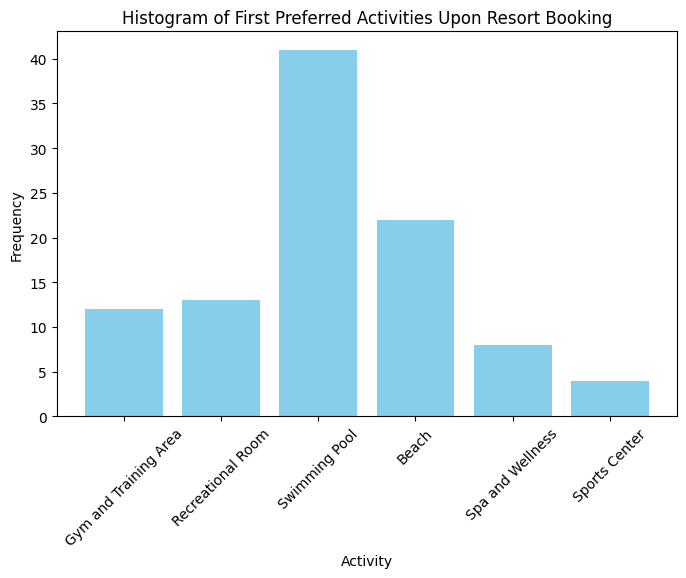

In [5]:
# Descriptive analysis of the most frequent first preferred activity upon resort booking
activity_counts = Counter()

for activities in data.iloc[:, 3]:
    if pd.notna(activities):
        for activity in activities.split(", "):
            activity_counts[activity] += 1

max_freq = max(activity_counts.values())

modes = [activity for activity, count in activity_counts.items() if count == max_freq]

print("Most frequent first preferred activity upon resort booking:", modes[0])
print("Frequency:", max_freq)

# Plot histogram
plt.figure(figsize=(8, 5))
plt.bar(activity_counts.keys(), activity_counts.values(), color='skyblue')
plt.xlabel("Activity")
plt.ylabel("Frequency")
plt.title("Histogram of First Preferred Activities Upon Resort Booking")
plt.xticks(rotation=45)
plt.show()


Most frequent expected time spent in swimming pool: 1-2 Hours
Frequency: 35
Most frequent expected time spent in beach: 1-2 Hours
Frequency: 34


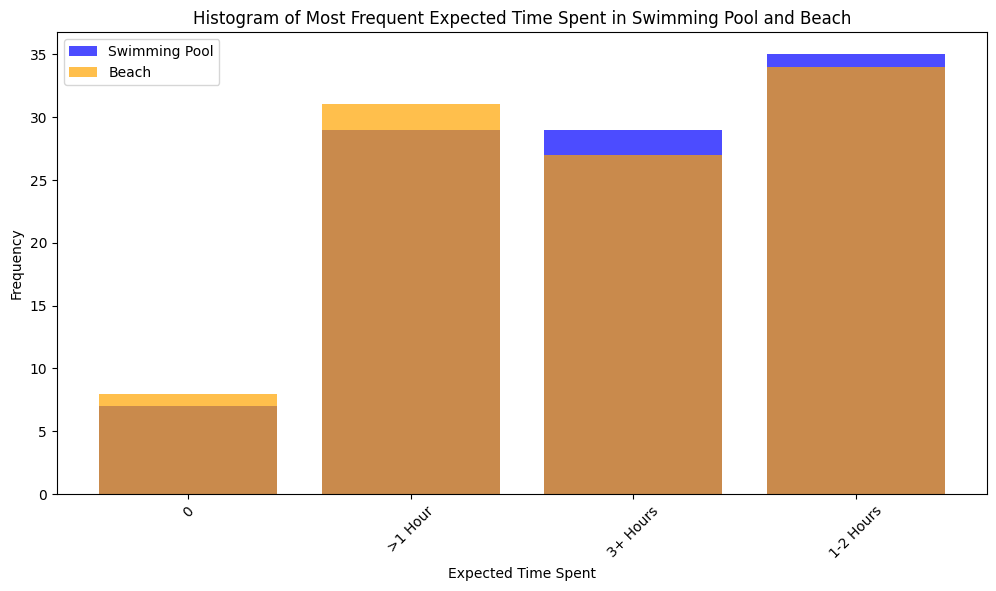

In [7]:
# Descriptive analysis of the most frequent expected time spent in swimming pool and beach
swimming_pool_counts = Counter()
beach_counts = Counter()

# Swimming Pool
for durations in data.iloc[:, 5]:
    if pd.notna(durations):
        for duration in map(str.strip, str(durations).split(",")):
            swimming_pool_counts[duration] += 1

# Beach
for durations in data.iloc[:, 6]:
    if pd.notna(durations):
        for duration in map(str.strip, str(durations).split(",")):
            beach_counts[duration] += 1

max_freq_swim = max(swimming_pool_counts.values(), default=0)
max_freq_beach = max(beach_counts.values(), default=0)

mode_swimming_pool = [duration for duration, count in swimming_pool_counts.items() if count == max_freq_swim]
mode_beach = [duration for duration, count in beach_counts.items() if count == max_freq_beach]

print("Most frequent expected time spent in swimming pool:", mode_swimming_pool[0] if mode_swimming_pool else "No data")
print("Frequency:", max_freq_swim)

print("Most frequent expected time spent in beach:", mode_beach[0] if mode_beach else "No data")
print("Frequency:", max_freq_beach)

# Plot histogram
plt.figure(figsize=(12, 6))
plt.bar(swimming_pool_counts.keys(), swimming_pool_counts.values(), alpha=0.7, label='Swimming Pool', color='blue')
plt.bar(beach_counts.keys(), beach_counts.values(), alpha=0.7, label='Beach', color='orange')

plt.xlabel("Expected Time Spent")
plt.ylabel("Frequency")
plt.title("Histogram of Most Frequent Expected Time Spent in Swimming Pool and Beach")
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [5]:
# Descriptive analysis of the most frequent age group
age_counts = Counter()

for age in data.iloc[:, 1]:
    if pd.notna(age):
        age_counts[str(age).strip()] += 1

max_freq = max(age_counts.values(), default=0)

modes = [age for age, count in age_counts.items() if count == max_freq]

print("Most frequent age group:", modes[0] if modes else "No data")
print("Frequency:", max_freq)


Most frequent age group: 19 - 25
Frequency: 62


In [25]:
# Convert age ranges into numerical values by taking the midpoint
age_mapping = {
    '<18': 17,  # Assuming 18 and below means 17 for calculation purposes
    '>66': 67   # Assuming 66 and above means 67 for calculation purposes
}

def convert_age(age):
    if isinstance(age, str):
        if '<' in age:
            return age_mapping['<18']
        elif '>' in age:
            return age_mapping['>66']
        else:
            start, end = map(int, age.split('-'))
            return (start + end) / 2  # Midpoint of the range
    return np.nan  # Handle unexpected values

# Apply conversion to the 'Age Group' column using .loc to avoid SettingWithCopyWarning
data.loc[:, 'Age Numeric'] = data['Age Group'].apply(convert_age)

# Calculate mean, median, and mode
mean_age = np.mean(data['Age Numeric'])
median_age = np.median(data['Age Numeric'])
mode_age = stats.mode(data['Age Numeric'], keepdims=True).mode[0]

# Print results
print("Mean Age:", mean_age)
print("Median Age:", median_age)
print("Mode Age:", mode_age)

Mean Age: 24.61
Median Age: 22.0
Mode Age: 22.0


Most frequent preferred time for swimming pool activities: Morning (5AM-11AM)
Frequency: 47
Most frequent preferred time for beach activities: Morning (5AM-11AM)
Frequency: 56


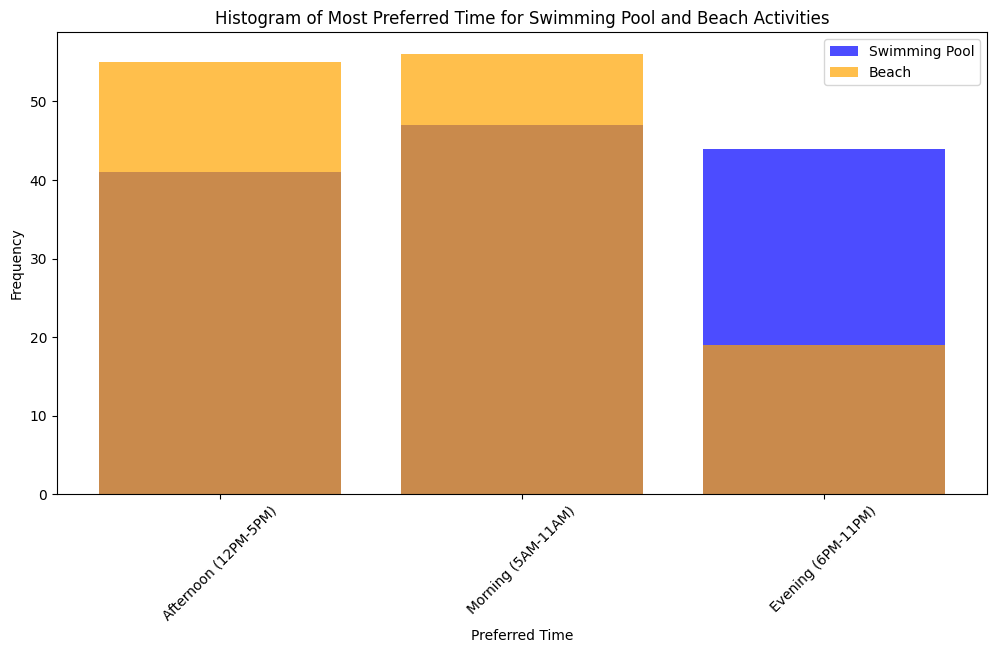

In [8]:
# Descriptive analysis of the most preferred time for swimming pool and beach activities
swimming_pool_counts = Counter()
beach_counts = Counter()

# Swimming Pool
for durations in data.iloc[:, 16]:
    if pd.notna(durations):
        for duration in map(str.strip, str(durations).split(",")):
            swimming_pool_counts[duration] += 1

# Beach
for durations in data.iloc[:, 17]:
    if pd.notna(durations):
        for duration in map(str.strip, str(durations).split(",")):
            beach_counts[duration] += 1

max_freq_swim = max(swimming_pool_counts.values(), default=0)
max_freq_beach = max(beach_counts.values(), default=0)

mode_swimming_pool = [duration for duration, count in swimming_pool_counts.items() if count == max_freq_swim]
mode_beach = [duration for duration, count in beach_counts.items() if count == max_freq_beach]

print("Most frequent preferred time for swimming pool activities:", mode_swimming_pool[0] if mode_swimming_pool else "No data")
print("Frequency:", max_freq_swim)

print("Most frequent preferred time for beach activities:", mode_beach[0] if mode_beach else "No data")
print("Frequency:", max_freq_beach)

# Plot histogram
plt.figure(figsize=(12, 6))
plt.bar(swimming_pool_counts.keys(), swimming_pool_counts.values(), alpha=0.7, label='Swimming Pool', color='blue')
plt.bar(beach_counts.keys(), beach_counts.values(), alpha=0.7, label='Beach', color='orange')

plt.xlabel("Preferred Time")
plt.ylabel("Frequency")
plt.title("Histogram of Most Preferred Time for Swimming Pool and Beach Activities")
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [26]:
#Descriptive analysis of the number of companions a customer is likely to bring
companions_mode = data["Number of Companions"].mode() 
mode_value = companions_mode.iloc[0] 
mode_frequency = data["Number of Companions"].value_counts()[mode_value] 
print("Most frequent number of companions:", mode_value)
print("Frequency:", mode_frequency)

Most frequent number of companions: 1-3
Frequency: 42


      Monthly Income  Income Category  Beach  Spa and Wellness  Swimming Pool
0            < 9,100                1     12                 4             24
1    9,100 to 18,200                2      2                 2              5
2   18,200 to 36,400                3      1                 1              4
3   36,400 to 63,700                4      2                 0              4
4  63,700 to 109,200                5      2                 0              2
5           109,200+                6      3                 1              2


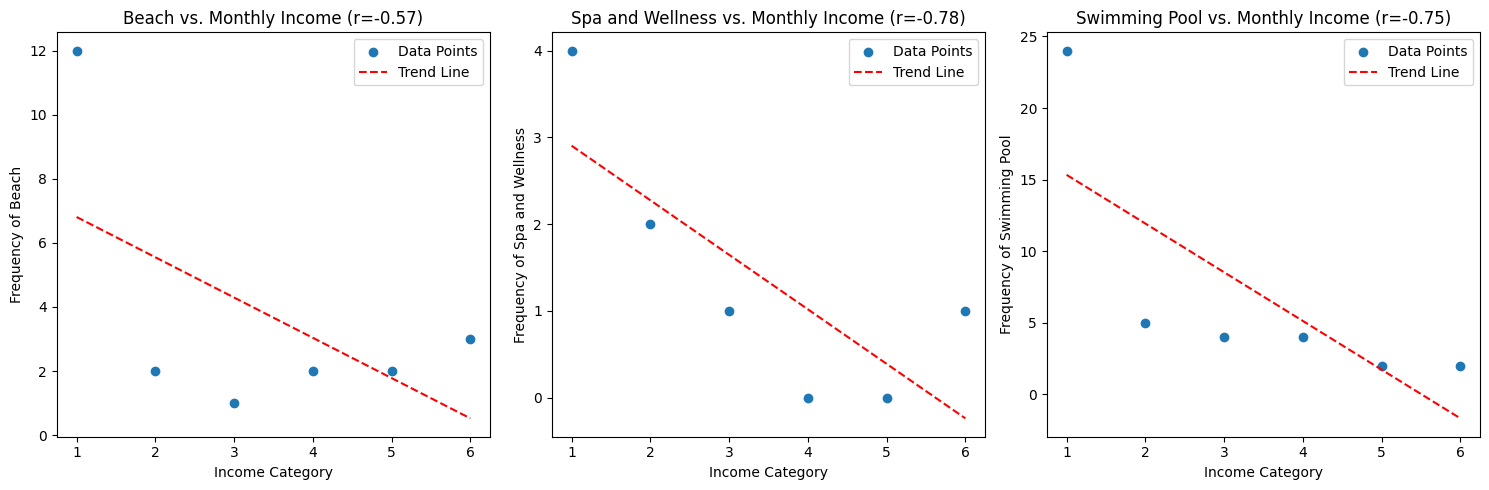

Correlations:
Beach vs. Monthly Income: -0.5693040864574421
Spa and Wellness vs. Monthly Income: -0.7810787627463989
Swimming Pool vs. Monthly Income: -0.7487634147514204


In [17]:
# Descriptive analysis for the correlation of monthly income to what activities the customers will participate in

# Load dataset
df = pd.read_csv('/Users/julianne/Downloads/_KalApache-Team Sports survey - Cleaned - Team Sports Survey.csv')  

# Keep only relevant columns
df = df[['Monthly Income (Php)', 'First Preferred Activity Upon Resort Booking']]

# Define income categories
income_mapping = {
    '< 9,100': 1,
    '9,100 to 18,200': 2,
    '18,200 to 36,400': 3,
    '36,400 to 63,700': 4,
    '63,700 to 109,200': 5,
    '109,200+': 6,
    '109,200 +': 6  
}

df['Income Category'] = df['Monthly Income (Php)'].map(income_mapping)

# Count preferences for Beach, Spa and Wellness, and Swimming Pool
categories = ['Beach', 'Spa and Wellness', 'Swimming Pool']
frequency_dict = {cat: [0] * 6 for cat in categories}  
for income_cat in range(1, 7):  
    subset = df[df['Income Category'] == income_cat]
    for cat in categories:
        frequency_dict[cat][income_cat - 1] = (subset['First Preferred Activity Upon Resort Booking'] == cat).sum()

# Create summary DataFrame
summary_df = pd.DataFrame({
    'Monthly Income': list(income_mapping.keys())[:6],  
    'Income Category': list(range(1, 7)),
    'Beach': frequency_dict['Beach'],
    'Spa and Wellness': frequency_dict['Spa and Wellness'],
    'Swimming Pool': frequency_dict['Swimming Pool']
})
print(summary_df)

# Calculate correlations and plot scatter plots
correlations = {}
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, cat in enumerate(categories):
    corr, _ = stats.pearsonr(summary_df['Income Category'], summary_df[cat])
    correlations[cat] = corr
    
    # Scatter plot
    axes[i].scatter(summary_df['Income Category'], summary_df[cat], label="Data Points")
    
    # Trend line
    z = np.polyfit(summary_df['Income Category'], summary_df[cat], 1)
    p = np.poly1d(z)
    axes[i].plot(summary_df['Income Category'], p(summary_df['Income Category']), "r--", label="Trend Line")
    
    axes[i].set_title(f"{cat} vs. Monthly Income (r={corr:.2f})")
    axes[i].set_xlabel("Income Category")
    axes[i].set_ylabel(f"Frequency of {cat}")
    axes[i].legend()

plt.tight_layout()
plt.show()

# Print correlation results
print("Correlations:")
for key, value in correlations.items():
    print(f"{key} vs. Monthly Income: {value}")

Peak Check-in Days:
Preferred Check-in Days
Saturday     71
Friday       64
Sunday       55
Thursday     18
Monday       16
Wednesday    13
Tuesday      10
Name: count, dtype: int64


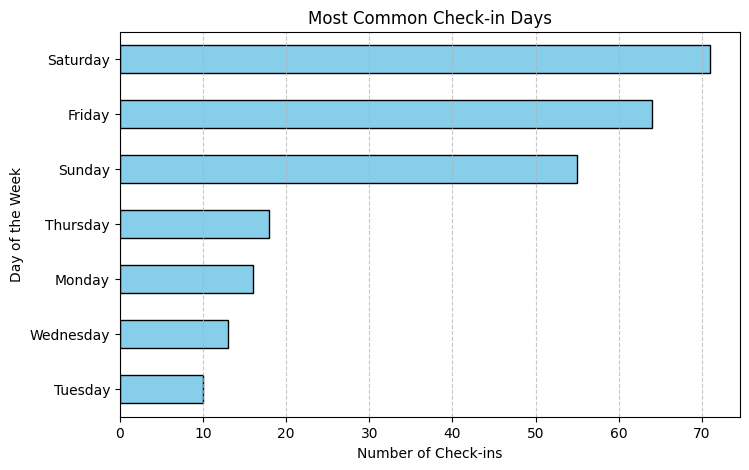

In [27]:
# Descriptive analysis for peak check in days
#Load the dataset
file_path = '/Users/julianne/Downloads/_KalApache-Team Sports survey - Cleaned - Team Sports Survey.csv'
df = pd.read_csv(file_path)

# Drop unnecessary columns (keeping only 'Preferred Check-in Days')
df = df[['Preferred Check-in Days']].dropna()

# Split check-in days into a list
df['Preferred Check-in Days'] = df['Preferred Check-in Days'].str.split(', ')

# Flatten the list into a single column
all_days = df.explode('Preferred Check-in Days')

# Count occurrences of each day
day_counts = all_days['Preferred Check-in Days'].value_counts()

# Display results
print("Peak Check-in Days:")
print(day_counts)

# Plot the results
plt.figure(figsize=(8, 5))
day_counts.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel("Number of Check-ins")
plt.ylabel("Day of the Week")
plt.title("Most Common Check-in Days")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()